2.1 퍼셉트론이란? 

2.2 단순한 논리 회로 

      2.2.1 AND 게이트 
      2.2.2 NAND 게이트와 OR 게이트 

2.3 퍼셉트론 구현하기 

     2.3.1 간단한 구현부터 
     2.3.2 가중치와 편향 도입 
     2.3.3 가중치와 편향 구현하기 

2.4 퍼셉트론의 한계 

     2.4.1 도전! XOR 게이트 
     2.4.2 선형과 비선형 

2.5 다층 퍼셉트론이 출동한다면 

     2.5.1 기존 게이트 조합하기 
     2.5.2 XOR 게이트 구현하기 

2.6 NAND에서 컴퓨터까지

---



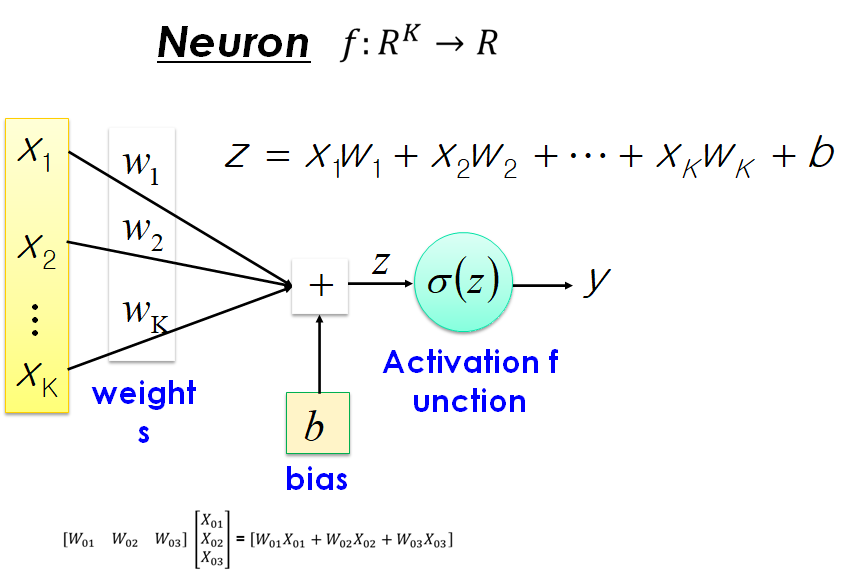

논리회로 진리표

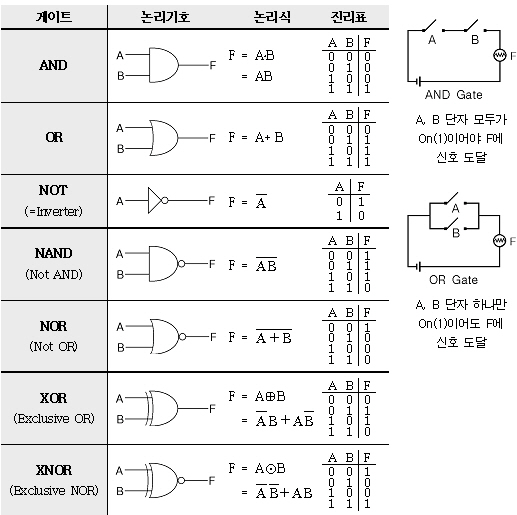

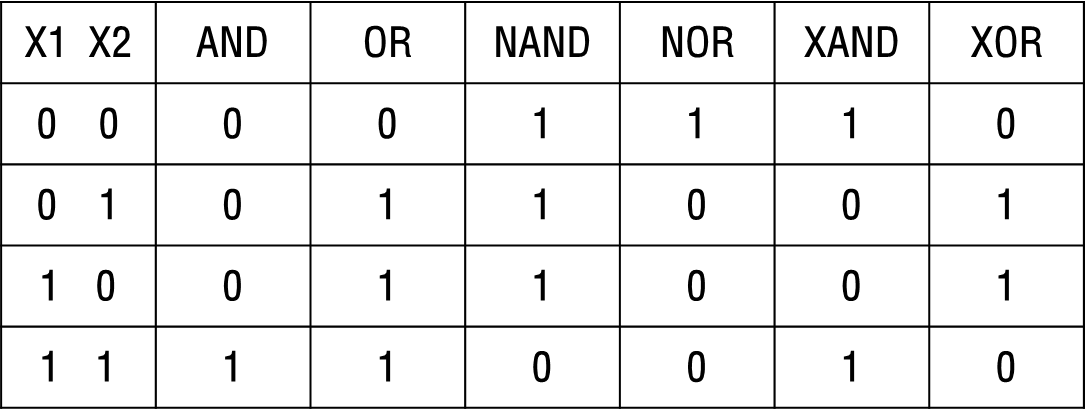

퍼셉트론을 사용한 논리회로 구현

    퍼셉트론의 파라미터(w1, w2, b)를 조정하여 논리회로를 구현함

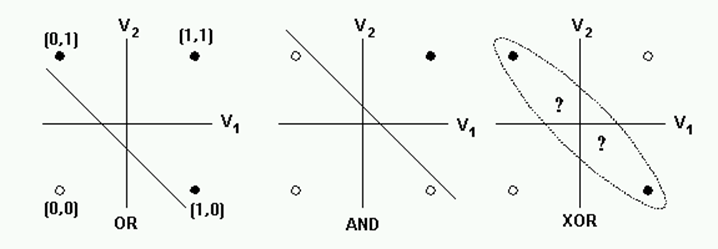

AND gate 
- AND 게이트를 퍼셉트론으로 구현

    (w1, w2, b) = (0.5, 0.5, -0.7)일 때 
    AND 게이트 퍼셉트론 식


    가중치(w1, w2)와 편향(b)
\begin{equation*}
z = 0.5x_1 + 0.5x_2 - 0.7
\end{equation*}


    activation function


\begin{equation*}
y = 0 (0.5x_1 + 0.5x_2 - 0.7 <= 0)
\end{equation*}
\begin{equation*}
y = 1 (0.5x_1 + 0.5x_2 - 0.7 > 0)
\end{equation*}

In [ ]:
# coding: utf-8
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b # w1x1 + w2x2 + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = AND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


OR gate
- 위 코드에서 bias를 수정 : 함수가 동일해도, bias 값에 따라 논리회로가 변화할 수 있음(AND, OR, NAND, NOR GATE)
- 즉 동일한 함수라도 parameter의 값에 따라 개념이 달라짐

    (w1, w2, b) = (0.5, 0.5, -0.2)일 때 
    OR 게이트 퍼셉트론 식


    가중치(w1, w2)와 편향(b)
\begin{equation*}
z = 0.5x_1 + 0.5x_2 - 0.2
\end{equation*}


    activation function


\begin{equation*}
y = 0 (0.5x_1 + 0.5x_2 - 0.2 <= 0)
\end{equation*}
\begin{equation*}
y = 1 (0.5x_1 + 0.5x_2 - 0.2 > 0)
\end{equation*}

In [ ]:
# or_gate.py 
# coding: utf-8
import numpy as np

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = OR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


NAND gate

    (w1, w2, b) = (-0.5, -0.5, 0.7)일 때 
    NAND 게이트 퍼셉트론 식


    가중치(w1, w2)와 편향(b)
\begin{equation*}
z = - 0.5x_1 - 0.5x_2 + 0.7
\end{equation*}


    activation function


\begin{equation*}
y = 0 (- 0.5x_1 - 0.5x_2 + 0.2 <= 0)
\end{equation*}
\begin{equation*}
y = 1 (- 0.5x_1 - 0.5x_2 + 0.2 > 0)
\end{equation*}

In [ ]:
# nand_gate.py
# coding: utf-8
import numpy as np


def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
#    b = 0.5
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = NAND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))


(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


바이어스에 따른 논리회로의 변화

    AND 와 OR

In [ ]:
# coding: utf-8
import numpy as np


def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    #b = -1.0   # all 0
    #b = -0.9   # and
    #b = -0.8   # and
    b = -0.7   # and original
    #b = -0.6   # and
    #b = -0.5   # and
    #b = -0.4   # or
    #b = -0.3   # or 
    #b = -0.2   # or 
    #b = -0.1   # or 
    #b =  0.0   # or 
    #b =  0.1   # all 1 
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = AND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


    NAND 와 NOR

In [ ]:
# coding: utf-8
import numpy as np

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    #b =  1.2   # all 1
    #b =  1.1   # all 1
    #b =  1.0   # nand
    #b =  0.9   # nand
    #b =  0.8   # nand
    b =  0.7   # nand original
    #b =  0.6   # nand
    #b =  0.5   # nor
    #b =  0.4   # nor
    #b =  0.3   # nor 
    #b =  0.2   # nor 
    #b =  0.1   # nor 
    #b = -0.0   # all 0 
    #b = -0.1   # all 0 
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = NAND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


다층 퍼셉트론
XOR Gate : 2개의 layer를 두어 xor 문제까지 해결  
-> 따라서 모든 논리 조합을 구현할 수 있으니 퍼셉트론으로 컴퓨터 만들 수 있다

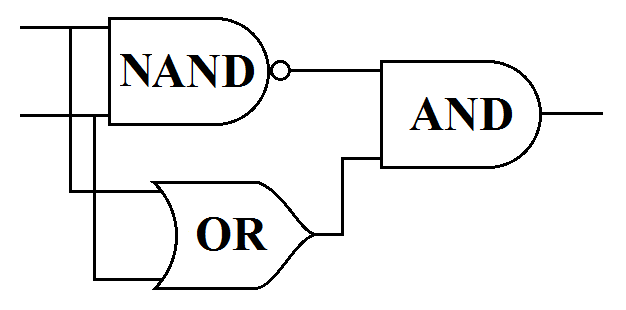

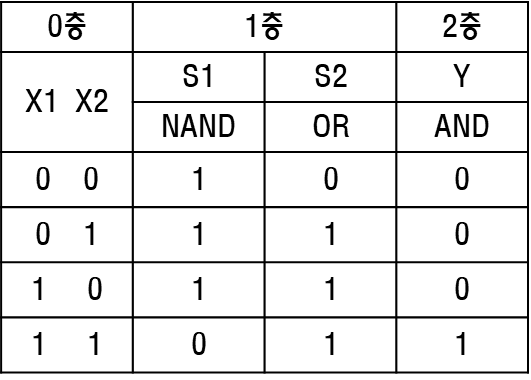

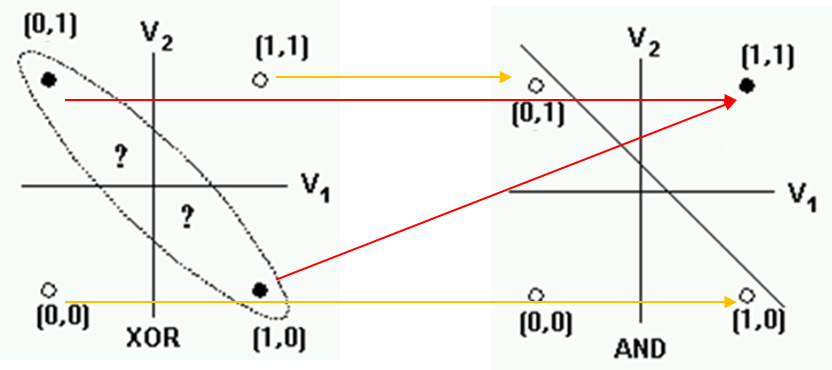

In [ ]:
# coding: utf-8

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)

    y = AND(s1, s2)
    return y

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


보충 : 퍼셉트론의 시각화

OR

```
퍼셉트론의 시각화: 회색 영역은 0을 출력하는 영역. 전체 영역을 OR 게이트 성질을 만족
- 0이 되는 지점을 찾으면, 이를 기준으로 0보다 큰지(1의 구간) 작은지(0의 구간) 판단할 수 있음
```
\begin{equation*}
0.5x_1 + 0.5x_2 - 0.2 = 0
\end{equation*}

\begin{equation*}
x_2 = - x_1 + 0.4
\end{equation*}


\begin{equation*}
(x_1 = 0)  => (x_2 = 0.4)
\end{equation*}
\begin{equation*}
(x_2 = 0)  => (x_1 = 0.4)
\end{equation*}

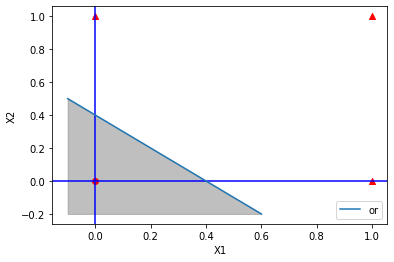

In [ ]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

x1 = np.arange(-0.1, 1.1, 0.7)
x2 = -x1 + 0.4

plt.axvline(x=0, color = 'b')  # draw x =0 axes
plt.axhline(y=0, color = 'b')   # draw y =0 axes

# 그래프 그리기
plt.plot(x1, x2, label="or")
plt.xlabel("X1") # x축 이름
plt.ylabel("X2") # y축 이름
plt.legend()

#plt.fill_between(x1, x2, '-3', color='grey', alpha='0.5')
plt.fill_between(x1, x2, -0.2, color='grey', alpha=0.5)

plt.scatter([0],[0],marker='o',color='r')
plt.scatter([1,0,1],[0,1,1],marker='^',color='r')
plt.show()

AND

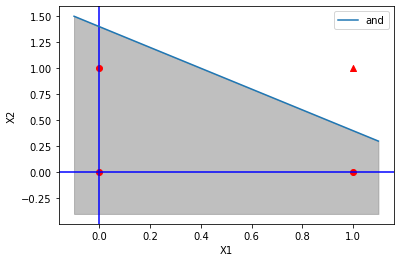

In [ ]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#x1 = np.arange(-0.1, 1.1, 1)
#x2 = -x1 + 0.4
x1 = np.arange(-0.1, 1.3, 0.2)
x2 = -x1 + 1.4

plt.axvline(x=0, color = 'b')  # draw x =0 axes
plt.axhline(y=0, color = 'b')   # draw y =0 axes

# 그래프 그리기
#plt.plot(x1, x2, label="or")
plt.plot(x1, x2, label="and")
plt.xlabel("X1") # x축 이름
plt.ylabel("X2") # y축 이름
plt.legend()

#plt.fill_between(x1, x2, '-3', color='grey', alpha='0.5')
plt.fill_between(x1, x2, -0.4, color='grey', alpha=0.5)

#plt.scatter([0],[0],marker='o',color='r')
#plt.scatter([1,0,1],[0,1,1],marker='^',color='r')
plt.scatter([0,1,0],[0,0,1],marker='o',color='r')
plt.scatter([1],[1],marker='^',color='r')

plt.show()

NOR

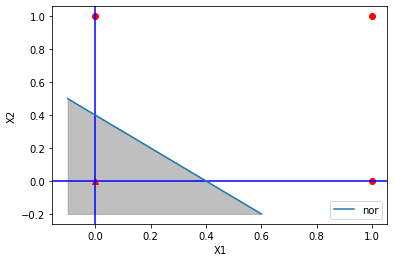

In [ ]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

x1 = np.arange(-0.1, 1.1, 0.7)
x2 = -x1 + 0.4

plt.axvline(x=0, color = 'b')   # draw x =0 axes
plt.axhline(y=0, color = 'b')   # draw y =0 axes

# 그래프 그리기
plt.plot(x1, x2, label="nor")
plt.xlabel("X1") # x축 이름
plt.ylabel("X2") # y축 이름
plt.legend()

#plt.fill_between(x1, x2, '-3', color='grey', alpha='0.5')
plt.fill_between(x1, x2, -0.2, color='grey', alpha=0.5)

#plt.scatter([0],[0],marker='o',color='r')
#plt.scatter([1,0,1],[0,1,1],marker='^',color='r')
plt.scatter([1,0,1],[0,1,1],marker='o',color='r')
plt.scatter([0],[0],marker='^',color='r')
plt.show()

NAND

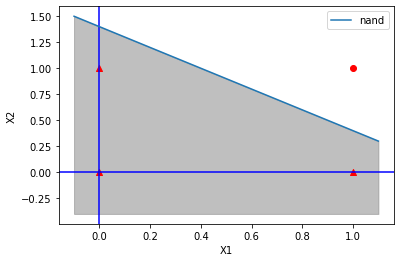

In [ ]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#x1 = np.arange(-0.1, 1.1, 1)
#x2 = -x1 + 0.4
x1 = np.arange(-0.1, 1.3, 0.2)
x2 = -x1 + 1.4

plt.axvline(x=0, color = 'b')  # draw x =0 axes
plt.axhline(y=0, color = 'b')   # draw y =0 axes

# 그래프 그리기
#plt.plot(x1, x2, label="or")
plt.plot(x1, x2, label="nand")
plt.xlabel("X1") # x축 이름
plt.ylabel("X2") # y축 이름
plt.legend()

#plt.fill_between(x1, x2, '-3', color='grey', alpha='0.5')
plt.fill_between(x1, x2, -0.4, color='grey', alpha=0.5)

#plt.scatter([0],[0],marker='o',color='r')
#plt.scatter([1,0,1],[0,1,1],marker='^',color='r')
plt.scatter([0,1,0],[0,0,1],marker='^',color='r')
plt.scatter([1],[1],marker='o',color='r')

plt.show()